*DATA WRANGLING* - Gerson Molina.
---------------------------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import os

In [4]:
ruta = '/Users/gersonmolina/Desktop/Data Sciencie'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


*Comenzamos con la exploración y la toma de decisiones de los datos:*

In [6]:
#Exploramos valores duplicados.

df.duplicated().value_counts()

False    128975
Name: count, dtype: int64

In [7]:
# Columnas nulos
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos, 'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0, :]
nulos_resumen = nulos_resumen.sort_values(by='Cant_Nulos', ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos
fulfilled-by,89699,0.695476
promotion-ids,49160,0.381159
currency,7795,0.060438
Amount,7795,0.060438
Courier Status,6872,0.053282
ship-state,40,0.000310
ship-postal-code,40,0.000310
ship-country,40,0.000310
ship-city,33,0.000256
B2B,7,0.000054


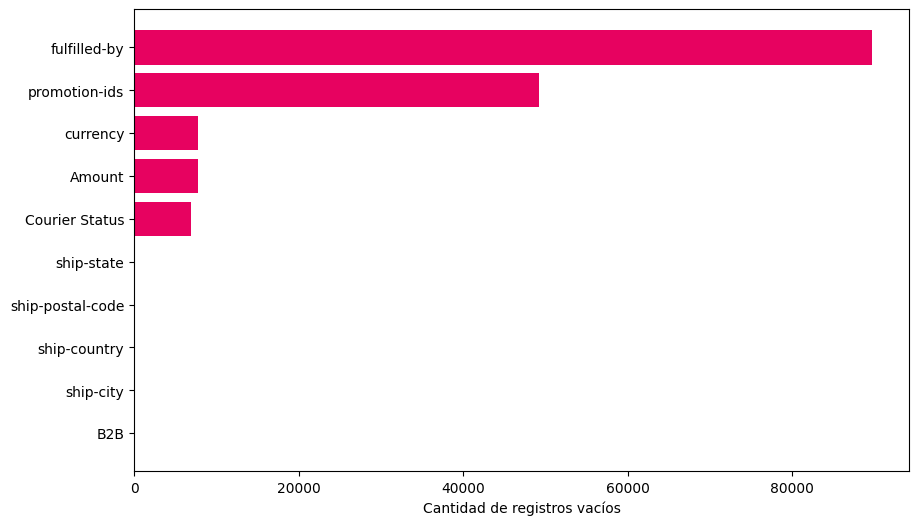

In [8]:
# Graficamos para obteer una mejor visualización de aquellos datos de columnas vacías:
 
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index, 
         nulos_resumen['Cant_Nulos'],
         color = '#E70260')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()  
plt.show()

Despues de la exploración de los datos procedemos a tomar decisiones:

In [9]:
#Llenamos los valores nulos con la sintaxis 'No especificado'.

df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

/var/folders/k6/32q21m0s1h9d2qyd_07__f4r0000gn/T/ipykernel_24273/4152851788.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ship-postal-code'].fillna('No especificado', inplace=True)


In [10]:
#Se eliminaron estas filas con valores nulos ya que no se consideraron indispensables para el análisis.

df.dropna(subset=['currency', 'Amount'], inplace=True)

In [13]:
#Imputamos las variables B2b y fulfilled-by con el método sklearn.

valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

In [14]:
#Creamos un imputador que reemplace los valores faltantes con la categoría más frecuente.

imputer = SimpleImputer(strategy='most_frequent')

In [15]:
# Realizamos la imputación solo en las columnas seleccionadas

df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

Verificamos que efectivamente se hayan realizado los cambios que hicimos en la toma de decisiones y no existan valores nulos.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Date                121180 non-null  object 
 3   Status              121180 non-null  object 
 4   Fulfilment          121180 non-null  object 
 5   ship-service-level  121180 non-null  object 
 6   Style               121180 non-null  object 
 7   SKU                 121180 non-null  object 
 8   Category            121180 non-null  object 
 9   Size                121180 non-null  object 
 10  ASIN                121180 non-null  object 
 11  Courier Status      121180 non-null  object 
 12  Qty                 121180 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           121180 non-null  ob